<a href="https://colab.research.google.com/github/Kush8765/ProjectsBot/blob/main/Classification_Model_to_Identify_Employee_Attrition_Project(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⭐⭐ Classification Model to Identify Employee Attrition**
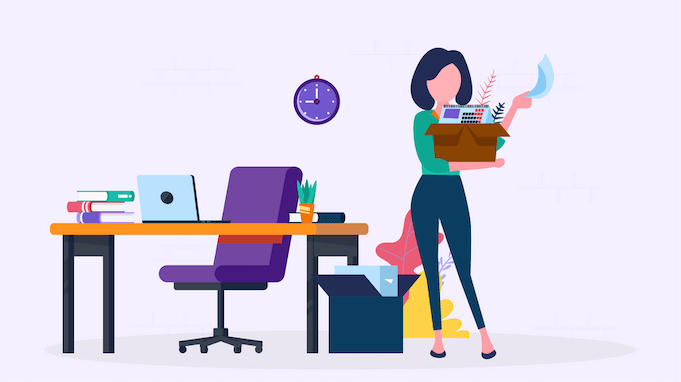

Description of variables

1. AGE :	Numerical Value
2. ATTRITION :	Employee leaving the company (0=no, 1=yes)
3. BUSINESS TRAVEL	: (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
4. DAILY RATE	: Numerical Value - Salary Level
5. DEPARTMENT : 	(1=HR, 2=R&D, 3=Sales)
6. DISTANCE FROM HOME :	Numerical Value - THE DISTANCE FROM WORK TO HOME
7. EDUCATION	Numerical Value
8. EDUCATION FIELD	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
9. EMPLOYEE COUNT	Numerical Value
10. EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID
11. ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT
12. GENDER	(1=FEMALE, 2=MALE)
13. HOURLY RATE	Numerical Value - HOURLY SALARY
14. JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT
15. JOB LEVEL	Numerical Value - LEVEL OF JOB
16. JOB ROLE	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
17. JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB
18. MARITAL STATUS	(1=DIVORCED, 2=MARRIED, 3=SINGLE)
19. MONTHLY INCOME	Numerical Value - MONTHLY SALARY
20. MONTHY RATE	Numerical Value - MONTHY RATE
21. NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT
22. OVER 18	(1=YES, 2=NO)
23. OVERTIME	(1=NO, 2=YES)
24. PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY
25. PERFORMANCE RATING	Numerical Value - PERFORMANCE RATING
26. RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION
27. STANDARD HOURS	Numerical Value - STANDARD HOURS
28. STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS
29. TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED
30. TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING
31. WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
32. YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
33. YEARS IN CURRENT ROLE	Numerical Value -YEARS IN 34. CURRENT ROLE
34. YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION
35. YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [5]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
#import data
employee=pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/EmployeeAttrition.csv')

In [7]:
#view data
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#info of data
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# summary statistics
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
# check for missing value
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# check for categories
employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

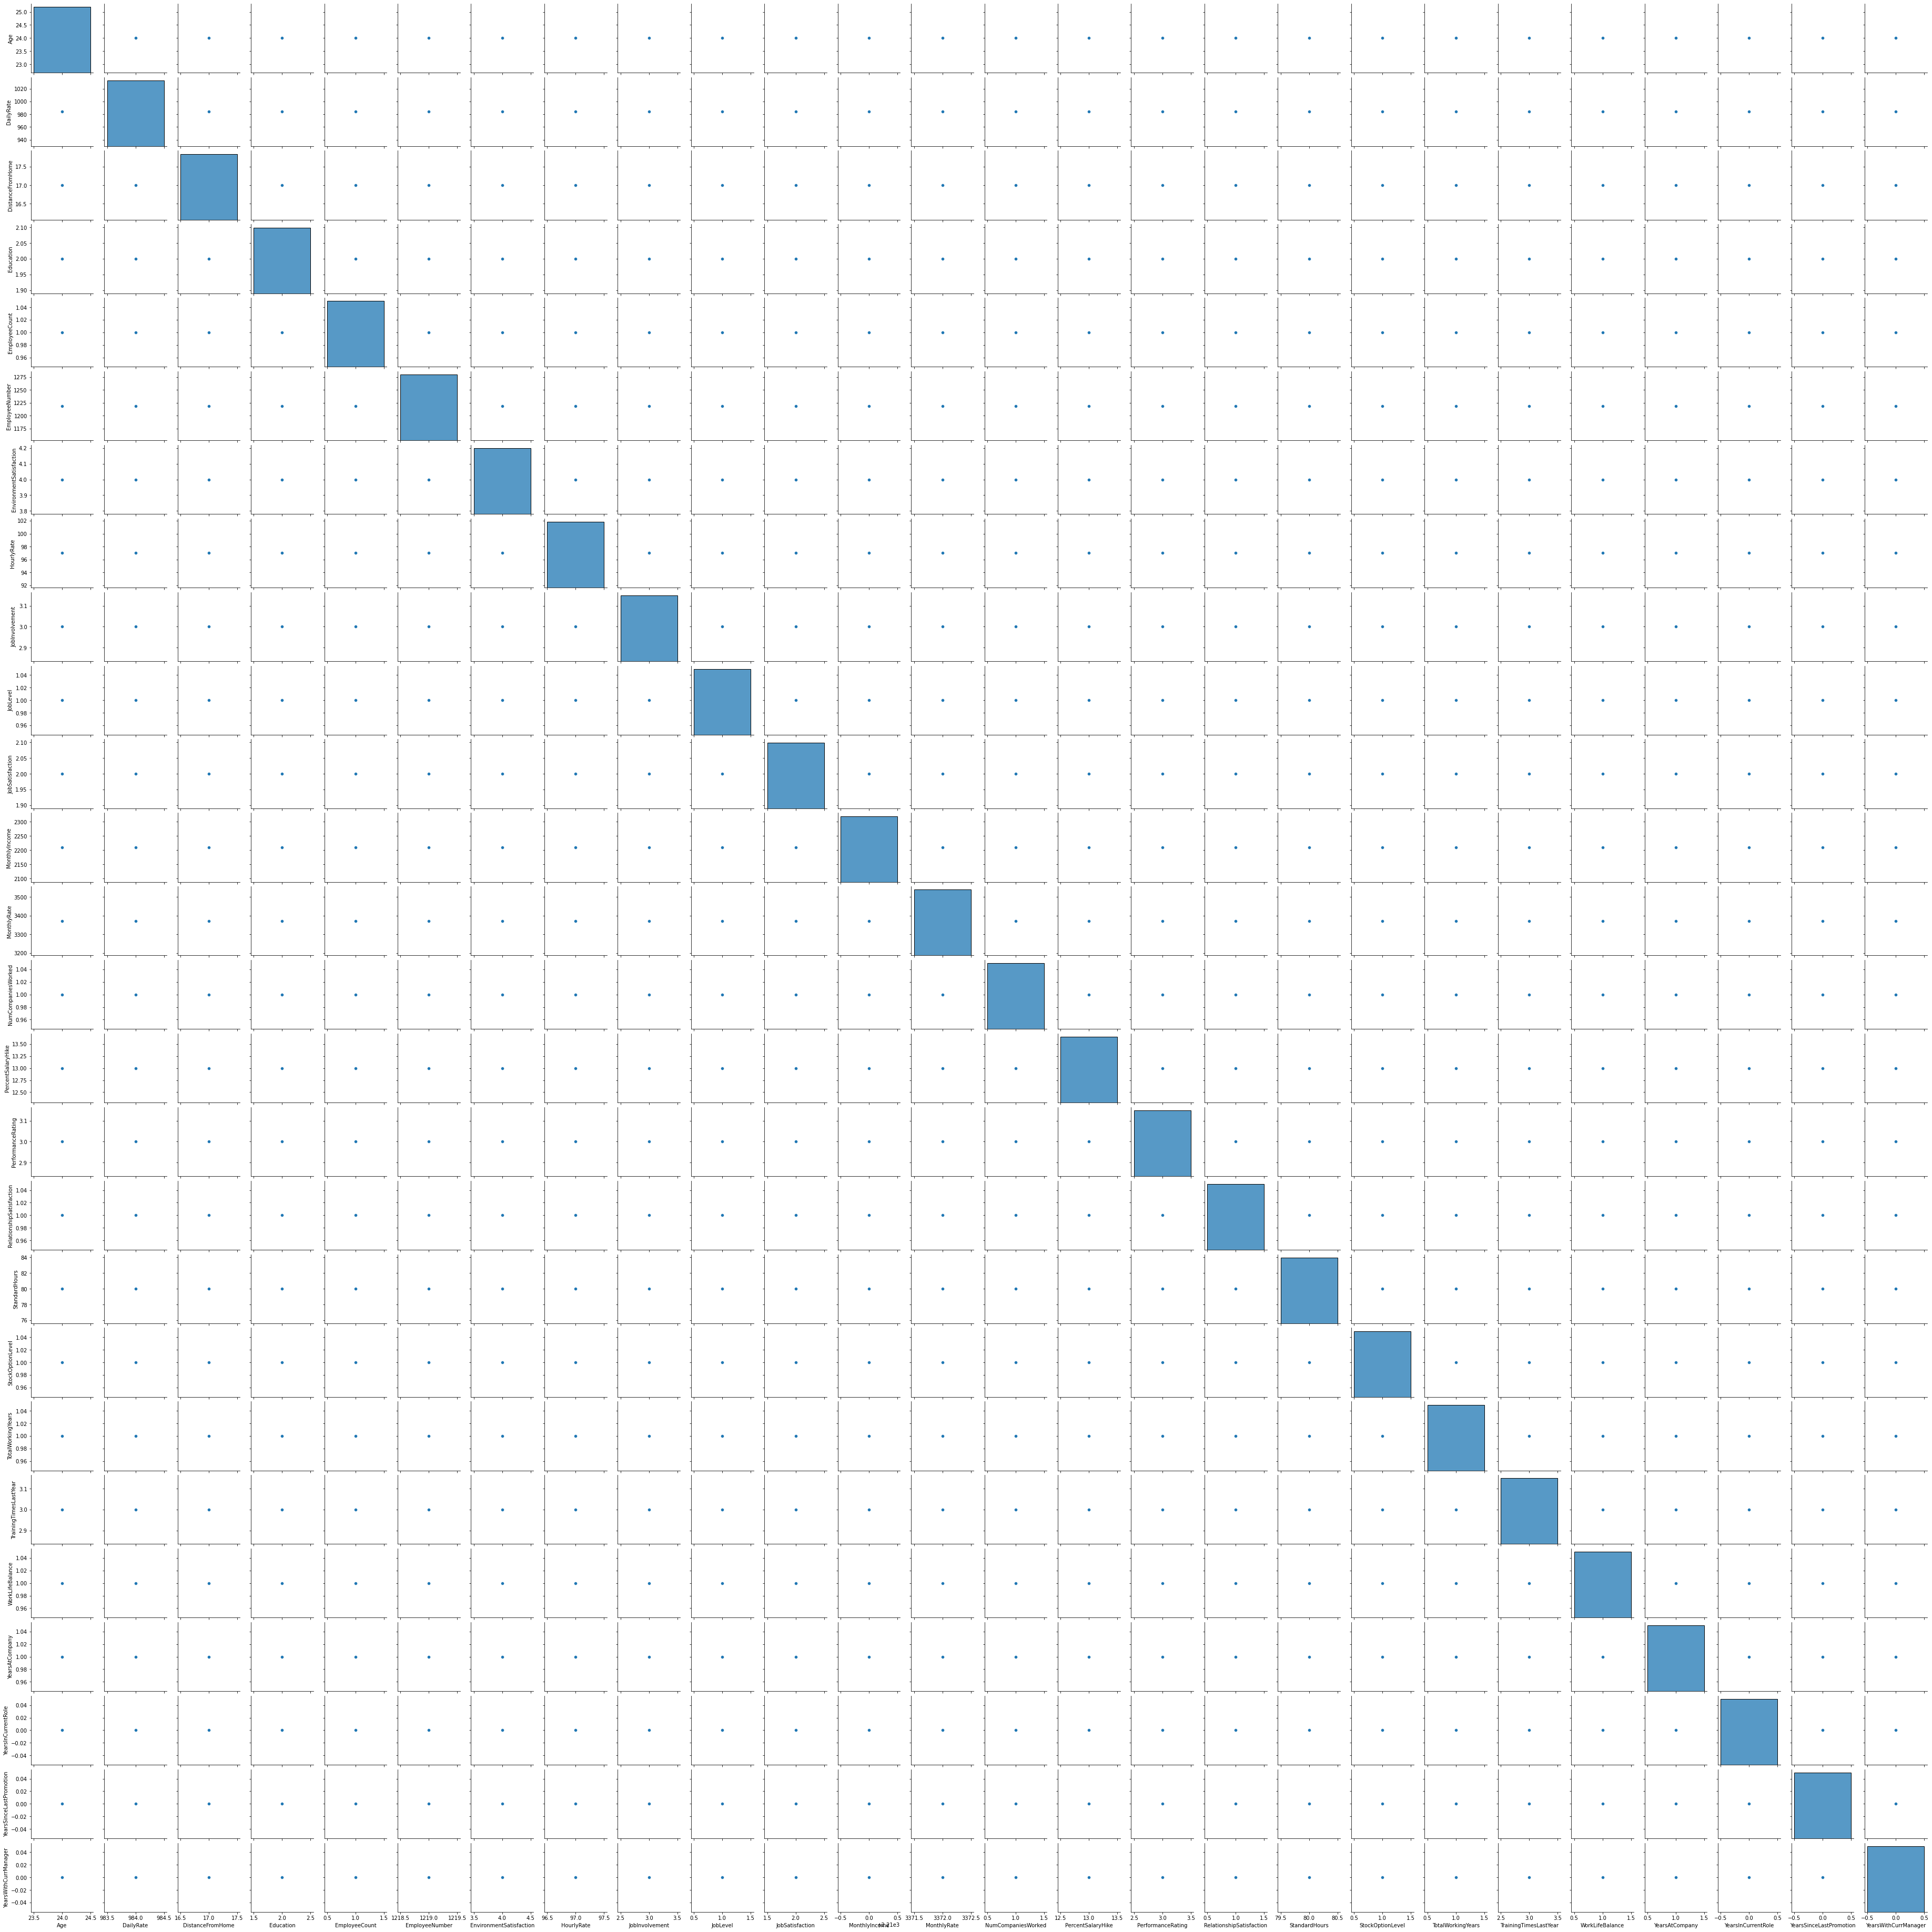

<Figure size 3744x3744 with 0 Axes>

In [12]:
# visualize pairplot
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

df=employee.sample()

sns_plot=sns.pairplot(df,height=2.0)
sns_plot.savefig("pairplot.png")

plt.clf()
Image(filename='pairplot.png')


In [13]:
# columns name
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
# column names of numerical columns
employee.describe().columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [15]:
# define y
y = employee['Attrition']

In [16]:
# define X
X = employee[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [17]:
# split data
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2529)

In [18]:
# verify shape
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((1029, 26), (441, 26), (1029,), (441,))

In [19]:
# select model
model = RandomForestClassifier()

In [20]:
# train model
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
# predict with model
y_pred = model.predict(x_test)

In [22]:
# model accuracy
accuracy_score(y_test, y_pred)

0.8594104308390023

In [23]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[369,   5],
       [ 57,  10]])

In [24]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.99      0.92       374
         Yes       0.67      0.15      0.24        67

    accuracy                           0.86       441
   macro avg       0.77      0.57      0.58       441
weighted avg       0.84      0.86      0.82       441



In [25]:
# future prediction
sample = employee.sample()
sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1420,41,No,Travel_Rarely,642,Research & Development,1,3,Life Sciences,1,1999,...,1,80,1,12,3,3,5,3,1,0


In [26]:
# define X_new
X_new = sample.loc[:,X.columns]
X_new

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1420,41,642,1,3,1,1999,4,76,3,1,...,1,80,1,12,3,3,5,3,1,0


In [27]:
# predict for X_new
model.predict(X_new)

array(['No'], dtype=object)